In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#Create our directory paths to our images
train_data_dir = 'data/train'
test_data_dir = 'data/test'
valid_data_dir = 'data/validation'

In [3]:
#Let's plot the number of images in each classification directory

def bar_plot(dir):
  x=len(os.listdir(dir+'/NORMAL'))
  y=len(os.listdir(dir+'/PNEUMONIA'))
  category = ['NORMAL', 'PNEUMONIA']
  count = [x, y]
  plot = plt.bar(category,count) 
  plot[0].set_color('orange')
  plt.title('Number of values for each category')
  plt.show()

Training images:

NORMAL: 1341
PNEUMONIA: 3875
Total Training images: 5216
*************************************************


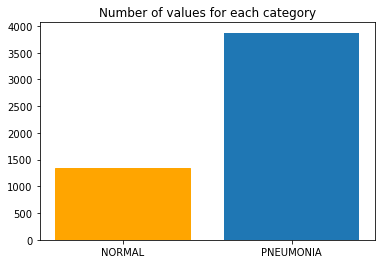

In [4]:
#Number of training images
print('Training images:\n')
print('NORMAL:', len(os.listdir(train_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(train_data_dir+'/PNEUMONIA')))
print('Total Training images:', len(os.listdir(train_data_dir+'/NORMAL')) + len(os.listdir(train_data_dir+'/PNEUMONIA')))
print('*'*49)
bar_plot(train_data_dir)

Test images:

NORMAL: 235
PNEUMONIA: 391
Total Test images: 626
*************************************************


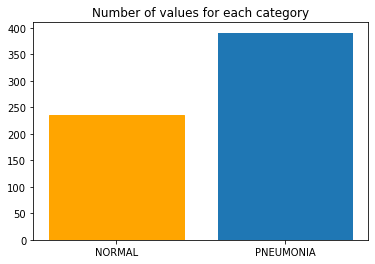

In [5]:
#Number of test images
print('Test images:\n')
print('NORMAL:', len(os.listdir(test_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(test_data_dir+'/PNEUMONIA')))
print('Total Test images:', len(os.listdir(test_data_dir+'/NORMAL')) + len(os.listdir(test_data_dir+'/PNEUMONIA')))
print('*'*49)
bar_plot(test_data_dir)

Validation images:

NORMAL: 8
PNEUMONIA: 8
Total Validation images: 16
***********************************************


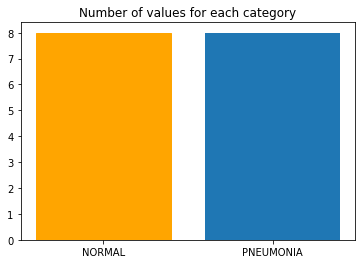

In [6]:
#Number of validation images
print('Validation images:\n')
print('NORMAL:', len(os.listdir(valid_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(valid_data_dir+'/PNEUMONIA')))
print('Total Validation images:', len(os.listdir(valid_data_dir+'/NORMAL')) + len(os.listdir(valid_data_dir+'/PNEUMONIA')))
print('*'*47)
bar_plot(valid_data_dir)


In [7]:
# Get all the data in the directory data/train and reshape them

train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=5216)

Found 5216 images belonging to 2 classes.


In [8]:
# Get all the data in the directory data/test and reshape them

test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=626)

Found 626 images belonging to 2 classes.


In [9]:
# Get all the data in the directory data/validation and reshape them

val_generator = ImageDataGenerator().flow_from_directory(
    valid_data_dir, 
    target_size=(64, 64), batch_size=16)

Found 16 images belonging to 2 classes.


In [11]:
#Create our different data sets
X_train, y_train = next(train_generator)
#X_test, y_test = next(test_generator)
X_val, y_val = next(val_generator)